In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
features = np.genfromtxt("./Aggregated_Data.csv", delimiter=",", usecols=(1, 3, 4, 5))
targets = np.genfromtxt("./Aggregated_Data.csv", delimiter=",", usecols=8)

trainingFeatures, testingFeatures, trainingTargets, testingTargets = train_test_split(features, targets, test_size = 0.25, random_state=0)


In [10]:
#follows the Confusion Matrix information page on Scikit Learn to visualize the plots
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plotMatrix(confusionMatrix, title, color):
    classLabels = ["No Outbreak", "Outbreak"]
    plt.rcParams['figure.figsize'] = (5.0, 5.0)
    plt.imshow(confusionMatrix, cmap=plt.cm.Blues)
    plt.xticks(ticks=[0,1], labels=classLabels)
    plt.yticks(ticks=[0,1], labels=classLabels)
    plt.ylabel("Predicted Labels")
    plt.xlabel("True Labels")
    plt.title(title)
    maximum = confusionMatrix.max()/2
    plt.text(0, 0, str(confusionMatrix[0][0]), horizontalalignment="center", verticalalignment="center" ,color=("white" if confusionMatrix[0][0] > maximum else "black"))
    plt.text(0, 1, str(confusionMatrix[0][1]), horizontalalignment="center", verticalalignment="center" ,color="black")
    plt.text(1, 0, str(confusionMatrix[1][0]), horizontalalignment="center", verticalalignment="center" ,color=color)
    plt.text(1, 1, str(confusionMatrix[1][1]), horizontalalignment="center", verticalalignment="center" ,color=("white" if confusionMatrix[1][1] > maximum else "black"))
    plt.show()

In [9]:
def thresholdBasedClassification(threshold, classifier, label, testingFeatures, testingTargets, color):
    predictions = []
    probabilities = classifier.predict_proba(testingFeatures)
    for j in range(0, probabilities.shape[0]):
        if (probabilities[j][1] <= threshold):
            predictions.append(0)
        else:
            predictions.append(1)
    ##https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    #uses the confusion_matrix documentation on Scikit Learn to calculate the confusion matrix
    confusionMatrix = confusion_matrix(testingTargets, predictions)
    #uses the Confusion Matrix information page on Scikit Learn to find out how to calculate the normalized matrix
    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    normalizedConfusionMatrix = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
    plotMatrix(confusionMatrix, label + (" Confusion Matrix (Threshold: %.4f" %threshold) + ")", color)
    plotMatrix(normalizedConfusionMatrix, label + (" Normalized Confusion Matrix (Threshold: %.4f" %threshold) + ")", color)

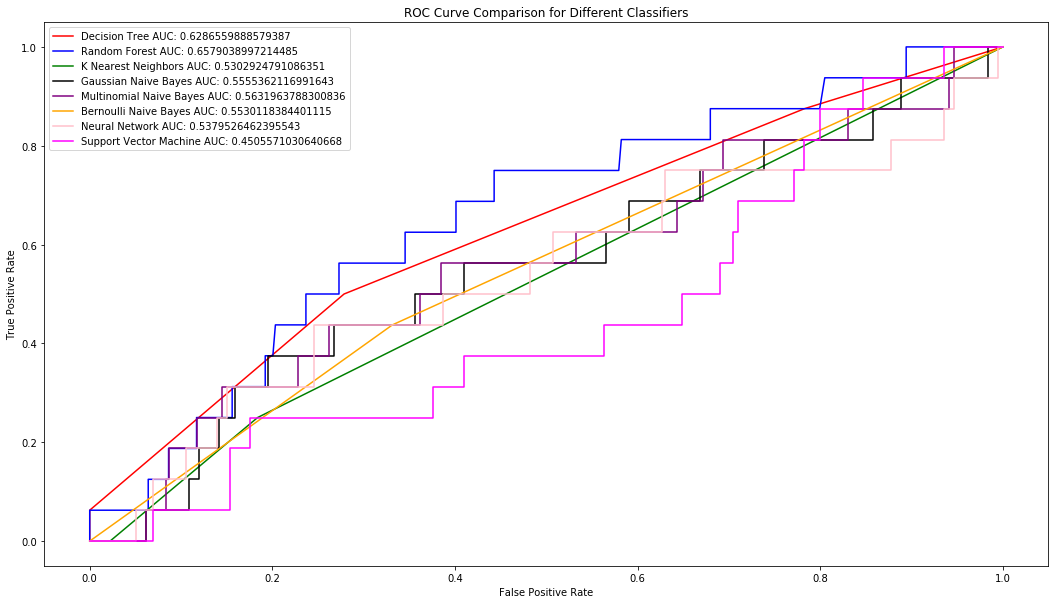

In [5]:

#The citations for the classifiers can be found in their respective files
decisionTree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4)
decisionTree.fit(trainingFeatures, trainingTargets)

randomForest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
randomForest.fit(trainingFeatures, trainingTargets)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(trainingFeatures, trainingTargets)

gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes.fit(trainingFeatures, trainingTargets)
multinomialNaiveBayes = MultinomialNB()
multinomialNaiveBayes.fit(trainingFeatures, trainingTargets)
bernoulliNaiveBayes = BernoulliNB(binarize=0.1)
bernoulliNaiveBayes.fit(trainingFeatures, trainingTargets)

network = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,), random_state=0, shuffle=True)
network.fit(trainingFeatures, trainingTargets)

svm = SVC(kernel='poly', degree=3, random_state=0, gamma='auto', probability=True)
svm.fit(trainingFeatures, trainingTargets)

classifiers = [decisionTree, randomForest, knn, gaussianNaiveBayes, multinomialNaiveBayes, bernoulliNaiveBayes, network, svm]
colors = ['red', 'blue', 'green', 'black', 'purple', 'orange', 'pink', 'magenta']
labels = ["Decision Tree", "Random Forest", 'K Nearest Neighbors', "Gaussian Naive Bayes", "Multinomial Naive Bayes", "Bernoulli Naive Bayes", "Neural Network", "Support Vector Machine"]

thresholds = []

plt.rcParams['figure.figsize'] = (18.0, 10.0)
for i in range(0,8):
    outbreakProbabilities = classifiers[i].predict_proba(testingFeatures)[:,1]
    #uses the documentation on Scikit Learn for roc_curve to calculate the values
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
    fpr, tpr, tresh = roc_curve(testingTargets, outbreakProbabilities)
    thresholds.append(np.median(outbreakProbabilities))
    #uses the documentation on Scikit Learn for auc on how to calculate auc
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
    area = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=labels[i]+" AUC: "+str(area))
    plt.legend()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for Different Classifiers")
plt.show()

    

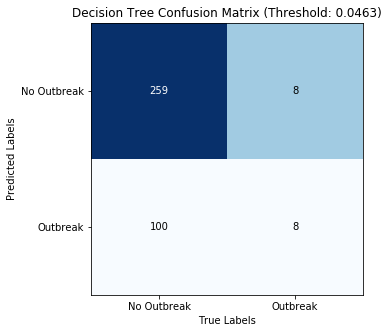

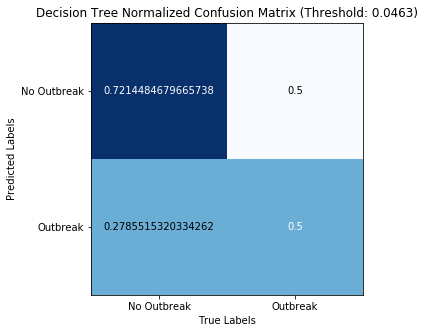

In [11]:
thresholdBasedClassification(thresholds[0], classifiers[0],labels[0], testingFeatures, testingTargets, "black")

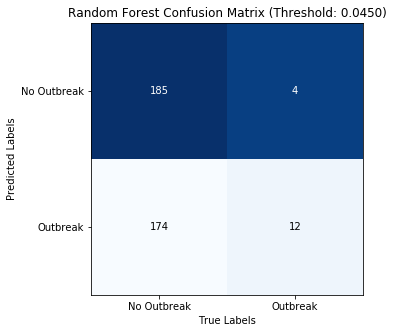

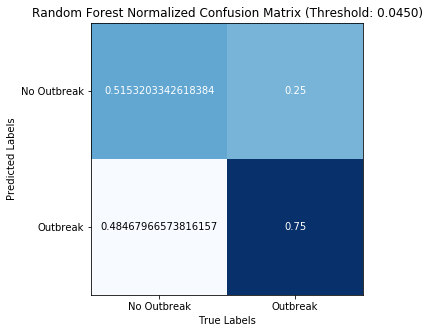

In [12]:
thresholdBasedClassification(thresholds[1], classifiers[1],labels[1], testingFeatures, testingTargets, "white")

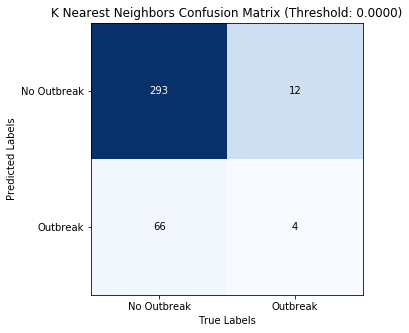

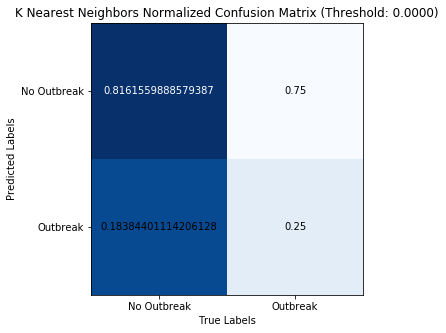

In [13]:
thresholdBasedClassification(thresholds[2], classifiers[2],labels[2], testingFeatures, testingTargets, "black")

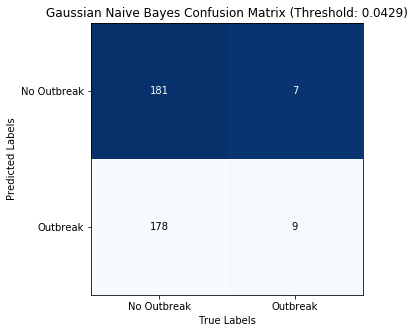

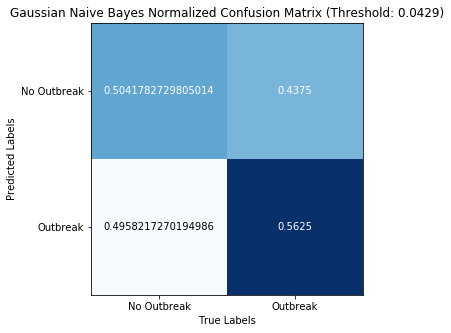

In [14]:
thresholdBasedClassification(thresholds[3], classifiers[3],labels[3], testingFeatures, testingTargets, "white")

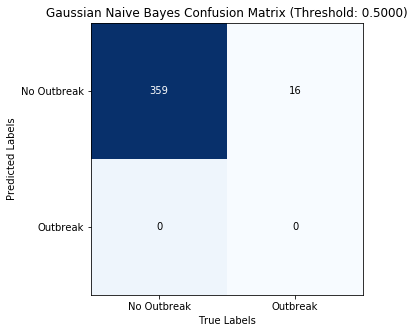

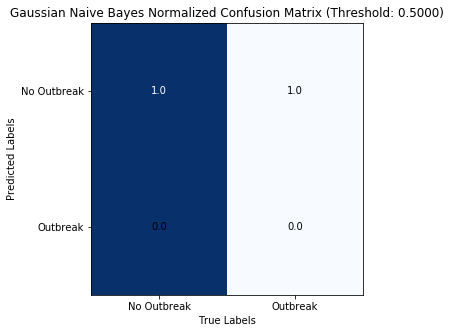

In [22]:
thresholdBasedClassification(0.5, classifiers[3],labels[3], testingFeatures, testingTargets, "black")

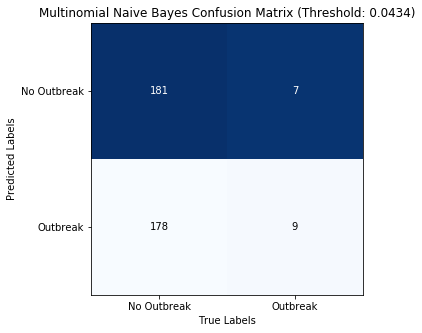

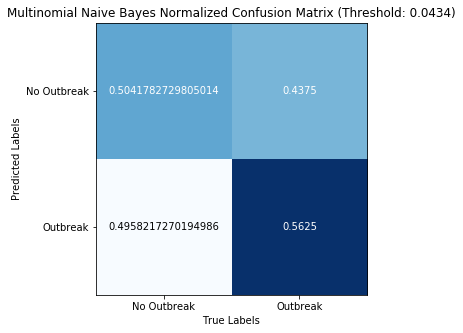

In [15]:
thresholdBasedClassification(thresholds[4], classifiers[4],labels[4], testingFeatures, testingTargets, "white")

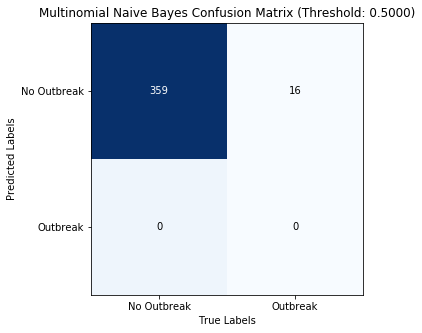

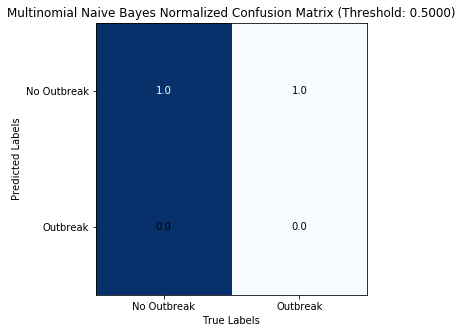

In [23]:
thresholdBasedClassification(0.5, classifiers[4],labels[4], testingFeatures, testingTargets, "black")

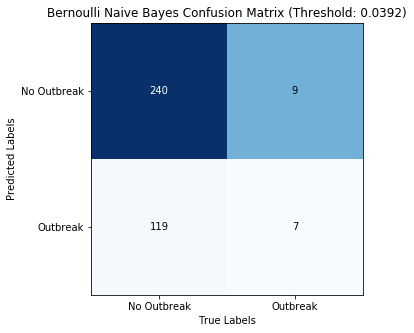

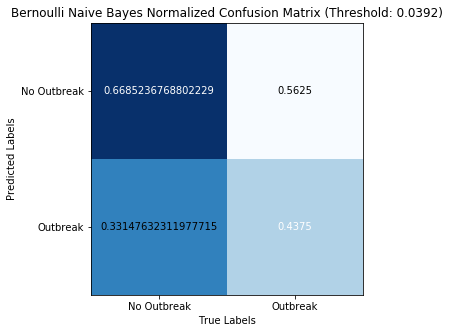

In [16]:
thresholdBasedClassification(thresholds[5], classifiers[5],labels[5], testingFeatures, testingTargets, "black")

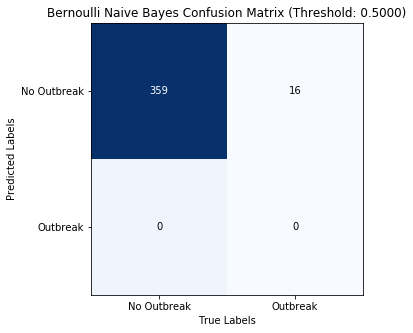

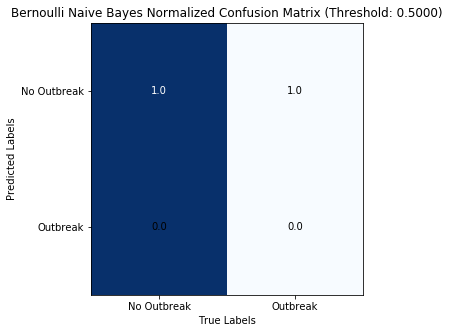

In [19]:
thresholdBasedClassification(0.5, classifiers[5],labels[5], testingFeatures, testingTargets, "black")

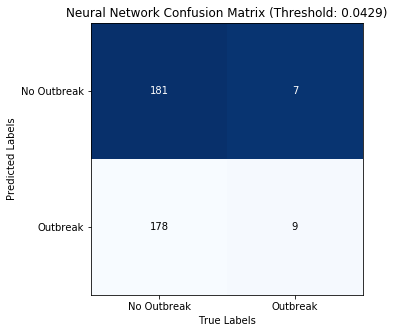

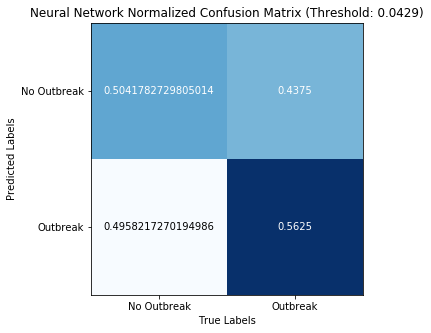

In [17]:
thresholdBasedClassification(thresholds[6], classifiers[6],labels[6], testingFeatures, testingTargets, "white")

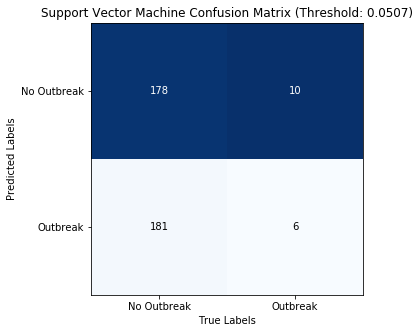

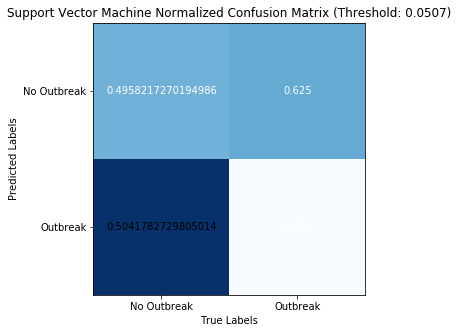

In [18]:
thresholdBasedClassification(thresholds[7], classifiers[7],labels[7], testingFeatures, testingTargets, "white")